In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils import *

In [2]:
test_cases = [0,1,2,3,4,5]
y_pred = np.empty((0,6,21))
y_gt = np.empty((0,6,21))

for tc in test_cases:
    print(f"start {tc}")
    model_folder = f"../training/saved/2024-04-03/{tc}_1_8_octaves"
    archive = np.load(model_folder + "/predictions.npz")
    print(f"{tc}: loaded archive")
    y_pred = np.concatenate((y_pred, archive["y_pred"]), axis=0)
    print(f"{tc}: loaded pred")
    y_gt = np.concatenate((y_gt, archive["y_gt"]), axis=0)
    print(f"{tc}: loaded gt")

start 0
0: loaded archive
0: loaded pred
0: loaded gt
start 1
1: loaded archive
1: loaded pred
1: loaded gt
start 2
2: loaded archive
2: loaded pred
2: loaded gt
start 3
3: loaded archive
3: loaded pred
3: loaded gt
start 4
4: loaded archive
4: loaded pred
4: loaded gt
start 5
5: loaded archive
5: loaded pred
5: loaded gt


String: 0
x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14]
y: [0.7985085227272727, 0.864693446088795, 0.8667906544228757, 0.8722250903458957, 0.8005390835579514, 0.5575800459932779, 0.7840088282504013, 0.31641604010025065, 0.40907145913564397, 0.01881331403762663, 0.01053740779768177, 0.0, 0.0, 0.0]



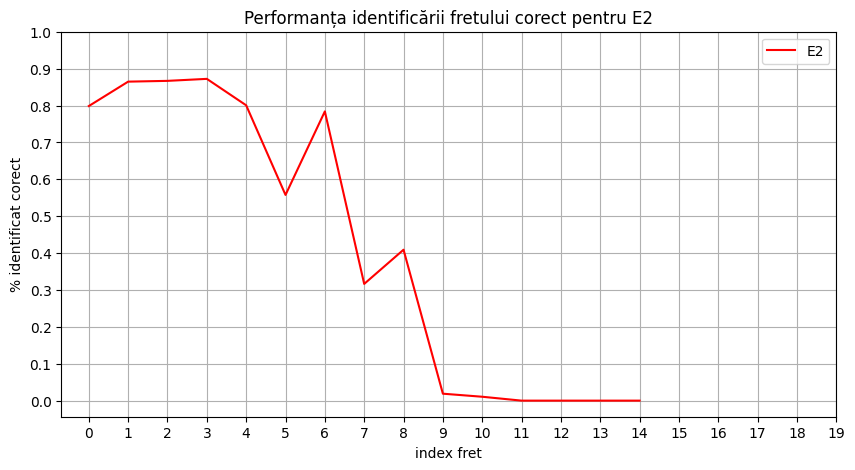

String: 1
x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
y: [0.5512745896868816, 0.48601184398611397, 0.8571333155223083, 0.909574762987193, 0.9232166803650993, 0.7480681500791361, 0.8990382381638248, 0.6657433056325023, 0.7218993114548868, 0.3745514766767872, 0.11653116531165311, 0.09767092411720511, 0.0, 0.0]



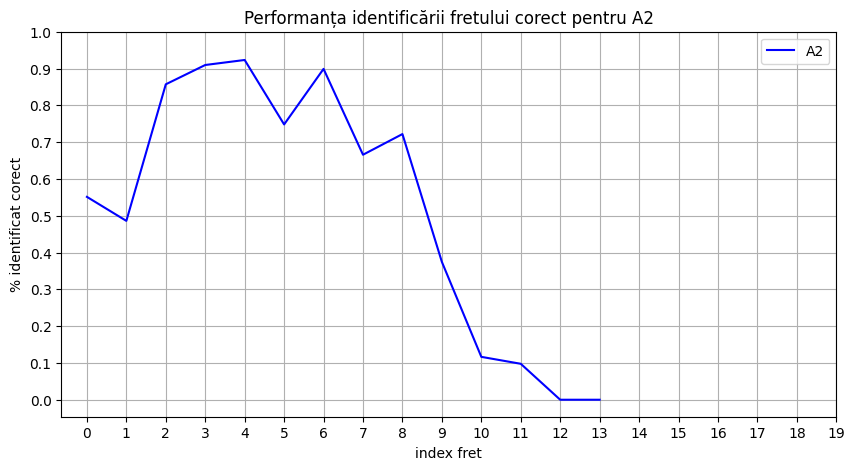

String: 2
x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
y: [0.7022953403605556, 0.2978293791014639, 0.7721726760409258, 0.8035855743172816, 0.7980107115531752, 0.7001905698653716, 0.8348007160340482, 0.7082755752703077, 0.7825616518642081, 0.5636748120300752, 0.6229297877303476, 0.3830252918287938, 0.01606217616580311, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]



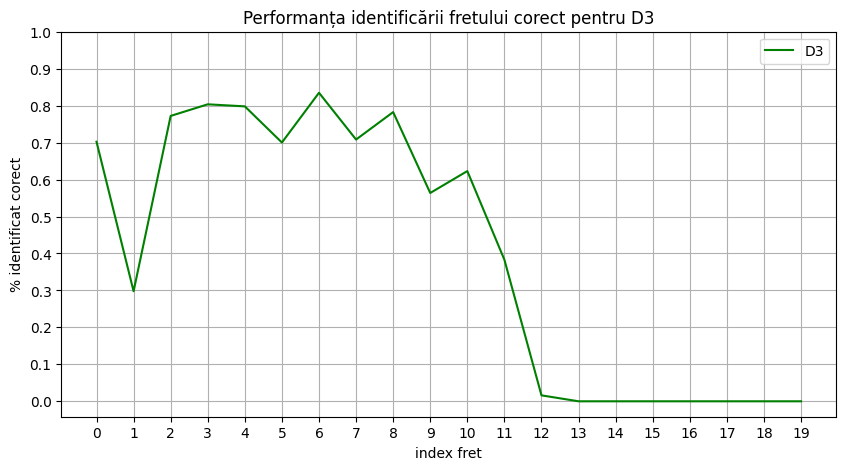

String: 3
x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
y: [0.7256091868172906, 0.71972049689441, 0.7164787393017253, 0.7071620504340637, 0.6339478389543128, 0.7327498010685461, 0.7935550865909624, 0.7587510432520006, 0.727682993946065, 0.5941751118415046, 0.5406030045172813, 0.4406627854903717, 0.18778696051423324, 0.10088781275221953, 0.0, 0.03685897435897436, 0.0, 0.0, 0.0]



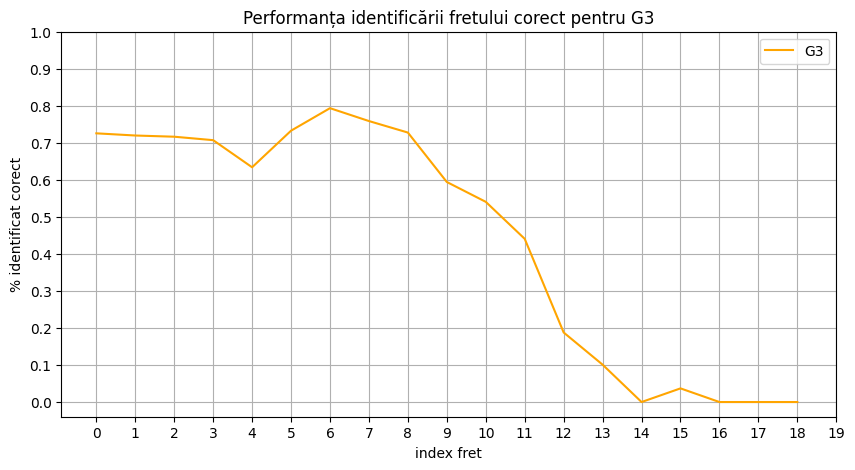

String: 4
x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]
y: [0.6875340723241868, 0.7632393245513217, 0.6250524021128532, 0.5681673616510001, 0.6532175689479061, 0.5999852420306966, 0.6914004914004914, 0.6704403497813867, 0.7947065592635213, 0.6064616582327754, 0.7082190146725516, 0.5774288518155054, 0.6424361493123772, 0.4715933361811192, 0.10404624277456648, 0.02535211267605634, 0.0, 0.0, 0.0]



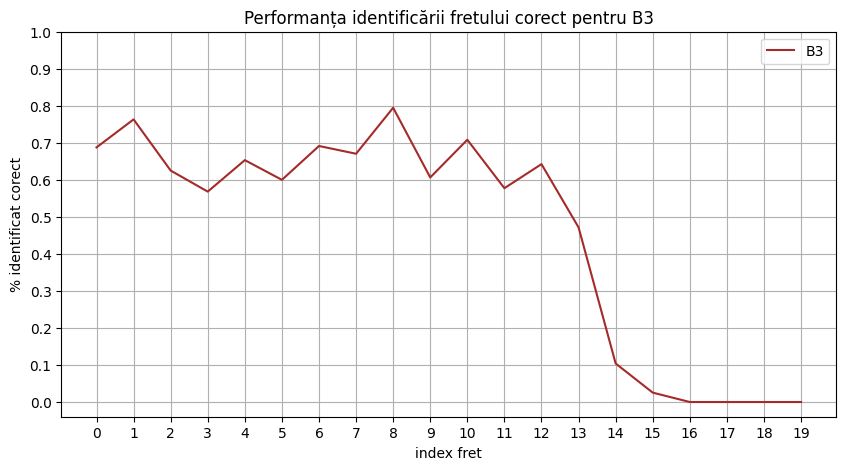

String: 5
x: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
y: [0.6322033898305085, 0.46303093864708966, 0.4586327621153492, 0.4863325740318907, 0.5877599524658348, 0.5256891419697166, 0.5461607409620556, 0.5804195804195804, 0.5728721336960746, 0.5875, 0.5080572963294538, 0.6634777715250422, 0.7616045845272207, 0.6917293233082706, 0.20833333333333334, 0.0, 0.0, 0.0]



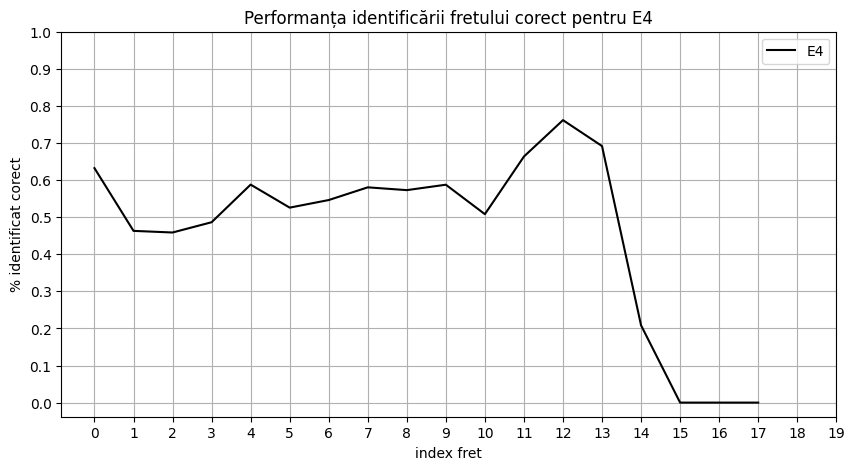

In [3]:
strings = ['E2', 'A2', 'D3', 'G3', 'B3', 'E4']
colors = ['red', 'blue', 'green', 'orange', 'brown', 'black']
results = []

for string in range(0,6):
    fret_gt_1 = [0] * 21
    fret_pred_1 = [0] * 21

    fret_gt_2 = [0] * 21
    fret_pred_2 = [0] * 21

    for i in range(len(y_pred)):
        gt_index = np.argmax(y_gt[i][string])
        pred_index = np.argmax(y_pred[i][string])
        if gt_index > 0:
            fret_gt_1[gt_index] += 1
            if gt_index == pred_index:
                fret_pred_1[pred_index] += 1

        if pred_index > 0:
            fret_pred_2[pred_index] += 1
            if gt_index == pred_index:
                fret_gt_2[gt_index] += 1

    x_gt = []
    x_pred = []
    y_values_gt = []
    y_values_pred = []
    for i in range(len(fret_gt_1)):
        if fret_gt_1[i] > 0:
            x_gt.append(i - 1)
            y_values_gt.append(fret_pred_1[i] / fret_gt_1[i])
        if fret_pred_2[i] > 0:
            x_pred.append(i-1)
            y_values_pred.append(fret_gt_2[i] / fret_pred_2[i])
    results.append(
        {
            "x" : x_gt,
            "y" : y_values_gt
        }
    )
    print(f"String: {string}\nx: {x_gt}\ny: {y_values_gt}\n")
    plt.figure(figsize=(10,5))
    plt.plot(x_gt, y_values_gt, label=f"{strings[string]}", color=colors[string])
    #plt.plot(x_pred, y_values_pred, label=f"{strings[string]} pred", color=colors[string], linestyle='dotted')
    plt.grid(True)
    plt.legend()
    plt.title(f'Performanța identificării fretului corect pentru {strings[string]}')
    plt.xlabel('index fret')
    plt.ylabel('% identificat corect')
    plt.xticks(np.arange(0, 20, step=1))
    plt.yticks(np.arange(0,1.1,step=0.1))
    plt.show()

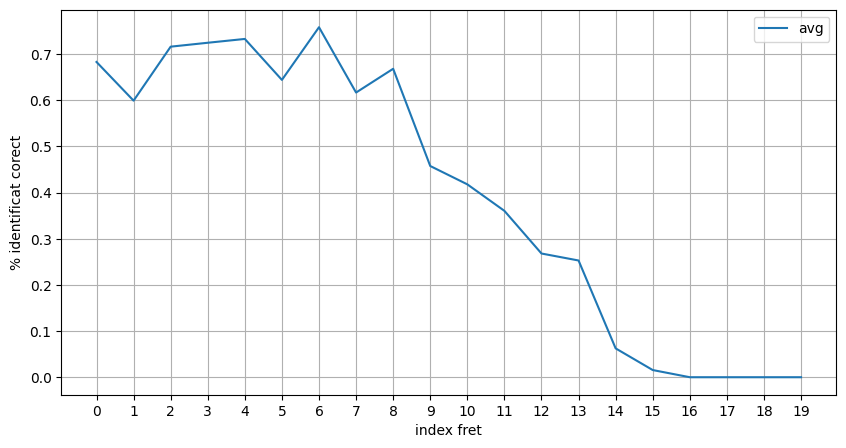

In [4]:
x_total = []
y_total = []
for i in range(0, 20):
    k = 0
    sum = 0
    for string in range(0,6):
        if i in results[string]["x"]:
            idx = results[string]["x"].index(i)
            k += 1
            sum += results[string]["y"][idx]
    if k > 0:
        x_total.append(i)
        y_total.append(sum/k)

plt.figure(figsize=(10,5))
plt.plot(x_total, y_total, label=f"avg")
plt.grid(True)
plt.legend()
plt.xlabel('index fret')
plt.ylabel('% identificat corect')
plt.xticks(np.arange(0, 20, step=1))
plt.show()